In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
from mint.config import DATA_DIR

import numpy as np
import pandas as pd
import json
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_path = DATA_DIR('TATQA')
filename="tatqa_dataset_train.json"
file_path = os.path.join(folder_path, filename)
with open(file_path, "r", encoding="utf-8") as f:
    train_data = json.load(f)
train_data

[{'table': {'uid': 'e78f8b29-6085-43de-b32f-be1a68641be3',
   'table': [['', '2019 %', '2018 %', '2017 %'],
    ['Weighted average actuarial assumptions used at 31 March1:', '', '', ''],
    ['Rate of inflation2', '2.9', '2.9', '3.0'],
    ['Rate of increase in salaries', '2.7', '2.7', '2.6'],
    ['Discount rate', '2.3', '2.5', '2.6']]},
  'paragraphs': [{'uid': '62be4f5a-1693-4e6b-8bb4-0a4e1e40b409',
    'order': 1,
    'text': 'Actuarial assumptions'},
   {'uid': 'c63e6ed5-8fe5-46e4-a02a-f923e90e8067',
    'order': 2,
    'text': 'The Group’s scheme liabilities are measured using the projected unit credit method using the principal actuarial assumptions set out below:'},
   {'uid': 'b4093fd4-43ea-4b31-9975-13c0012a0b18',
    'order': 3,
    'text': 'Notes: 1 Figures shown represent a weighted average assumption of the individual schemes.'},
   {'uid': '9f6ecb32-9e2c-4036-8209-8905855145c0',
    'order': 4,
    'text': '2 The rate of increases in pensions in payment and deferred reva

In [3]:
filename="tatqa_dataset_dev.json"
file_path = os.path.join(folder_path, filename)
with open(file_path, "r", encoding="utf-8") as f:
    dev_data = json.load(f)

In [4]:
filename="tatqa_dataset_test.json"
file_path = os.path.join(folder_path, filename)
with open(file_path, "r", encoding="utf-8") as f:
    test_data = json.load(f)

In [5]:
train_data[0].keys()

dict_keys(['table', 'paragraphs', 'questions'])

In [6]:
print(f"Tổng số mẫu huấn luyện: {len(train_data)+len(dev_data)+len(test_data)}")
print(f"Tổng số mẫu tập train: {len(train_data)}")
print(f"Tổng số mẫu tập test: {len(test_data)}")
print(f"Tổng số mẫu tập dev: {len(dev_data)}")

Tổng số mẫu huấn luyện: 2757
Tổng số mẫu tập train: 2201
Tổng số mẫu tập test: 278
Tổng số mẫu tập dev: 278


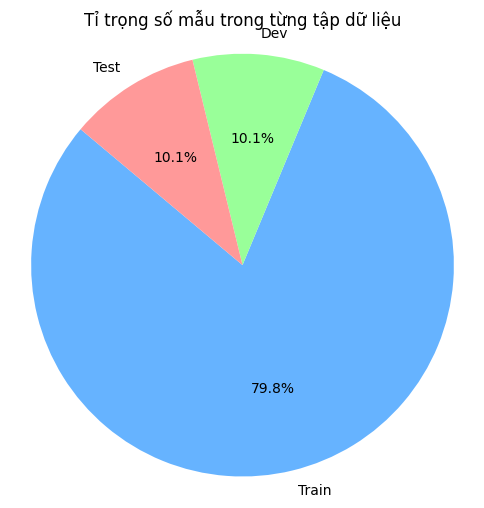

In [7]:
sizes = [len(train_data), len(dev_data), len(test_data)]
labels = ['Train', 'Dev', 'Test']
colors = ['#66b3ff', '#99ff99', '#ff9999']  # Màu đẹp hơn
# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Tỉ trọng số mẫu trong từng tập dữ liệu')
plt.axis('equal')  # Đảm bảo hình tròn
plt.show()

In [8]:
data = train_data + test_data + dev_data

In [9]:
df_tables = []
for item in data:
    table_data = item["table"]["table"]
    uid = item["table"]["uid"]
    
    df = pd.DataFrame(table_data)
    df.insert(0, "table_uid", uid)  # thêm UID để phân biệt bảng nào nếu cần
    df_tables.append(df)

# Ghép toàn bộ các bảng lại thành 1 DataFrame
df_all_tables = pd.concat(df_tables, ignore_index=True)


In [10]:
df_all_tables

table_uid  \
0      e78f8b29-6085-43de-b32f-be1a68641be3   
1      e78f8b29-6085-43de-b32f-be1a68641be3   
2      e78f8b29-6085-43de-b32f-be1a68641be3   
3      e78f8b29-6085-43de-b32f-be1a68641be3   
4      e78f8b29-6085-43de-b32f-be1a68641be3   
...                                     ...   
26004  8db2d2a5-fdcd-45c2-be2f-813cba4fbca7   
26005  8db2d2a5-fdcd-45c2-be2f-813cba4fbca7   
26006  8db2d2a5-fdcd-45c2-be2f-813cba4fbca7   
26007  8db2d2a5-fdcd-45c2-be2f-813cba4fbca7   
26008  8db2d2a5-fdcd-45c2-be2f-813cba4fbca7   

                                                       0       1       2  \
0                                                         2019 %  2018 %   
1      Weighted average actuarial assumptions used at...                   
2                                     Rate of inflation2     2.9     2.9   
3                           Rate of increase in salaries     2.7     2.7   
4                                          Discount rate     2.3     2.5   
...                                                  ...     ...     ...   
26004  Power - Operations, Maintenance & Construction...    19.9    31.0   
26005                Power - Cable Installation & Repair    32.6    34.8   
26006        Total revenue from contracts with customers   172.5   194.3   
26007                                      Other revenue       —       —   
26008              Total Marine Services segment revenue  $172.5  $194.3   

            3    4    5    6    7    8  
0      2017 %  NaN  NaN  NaN  NaN  NaN  
1              NaN  NaN  NaN  NaN  NaN  
2         3.0  NaN  NaN  NaN  NaN  NaN  
3         2.6  NaN  NaN  NaN  NaN  NaN  
4         2.6  NaN  NaN  NaN  NaN  NaN  
...       ...  ...  ...  ...  ...  ...  
26004     NaN  NaN  NaN  NaN  NaN  NaN  
26005     NaN  NaN  NaN  NaN  NaN  NaN  
26006     NaN  NaN  NaN  NaN  NaN  NaN  
26007     NaN  NaN  NaN  NaN  NaN  NaN  
26008     NaN  NaN  NaN  NaN  NaN  NaN  

[26009 rows x 10 columns]

In [11]:
df_paragraphs = []

for item in data:
    uid = item["table"]["uid"]
    for p in item["paragraphs"]:
        df_paragraphs.append({
            "table_uid": uid,
            "paragraph_uid": p["uid"],
            "order": p["order"],
            "text": p["text"]
        })
df_paragraphs = pd.DataFrame(df_paragraphs)

In [12]:
df_questions = []

for item in data:
    uid = item["table"]["uid"]
    for q in item["questions"]:
        df_questions.append({
            "table_uid": uid,
            "question_uid": q["uid"],
            "order": q["order"],
            "question": q["question"],
            "answer": q.get("answer", []),  # giữ nguyên list
            "answer_type": q.get("answer_type", "none"),
            "answer_from":q.get("answer_from", "none"),
            "req_comparison":q.get("req_comparison", "none"),
            "scale": q.get("scale", "none")
        })

df_questions = pd.DataFrame(df_questions)


In [13]:
total_questions = sum(len(item["questions"]) for item in data)
print("Tổng số câu hỏi:", total_questions)

num_questions_per_table = [len(item["questions"]) for item in data]

# Tạo DataFrame để dễ thống kê
df_table_stats = pd.DataFrame(num_questions_per_table, columns=["num_questions"])

# Tính thống kê: min, max, mean
min_q = df_table_stats["num_questions"].min()
max_q = df_table_stats["num_questions"].max()
mean_q = df_table_stats["num_questions"].mean()

print(f"Số câu hỏi tối thiểu trên mỗi bảng: {min_q}")
print(f"Số câu hỏi tối đa trên mỗi bảng: {max_q}")
print(f"Số câu hỏi trung bình trên mỗi bảng: {mean_q:.2f}")

Tổng số câu hỏi: 16552
Số câu hỏi tối thiểu trên mỗi bảng: 6
Số câu hỏi tối đa trên mỗi bảng: 8
Số câu hỏi trung bình trên mỗi bảng: 6.00


In [14]:
total_questions = len(df_questions)
hybrid_questions = df_questions[df_questions["answer_from"].str.contains("table") & df_questions["answer_from"].str.contains("text")]
num_hybrid = len(hybrid_questions)

answer_from_counter = Counter(df_questions["answer_from"])

print("Tổng số câu hỏi:", total_questions)
print("Số câu hỏi ngữ cảnh lai (từ bảng và văn bản):", num_hybrid)
print("\nThống kê answer_from:")
for k, v in answer_from_counter.items():
    print(f"{k}: {v}")

Tổng số câu hỏi: 16552
Số câu hỏi ngữ cảnh lai (từ bảng và văn bản): 4677

Thống kê answer_from:
table: 6692
text: 3514
table-text: 4677
none: 1669


/var/folders/zl/w0vj8dg91gg3w47_8p3fp2r00000gn/T/ipykernel_12371/2189516090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_questions, x='answer_type', palette='Set2')


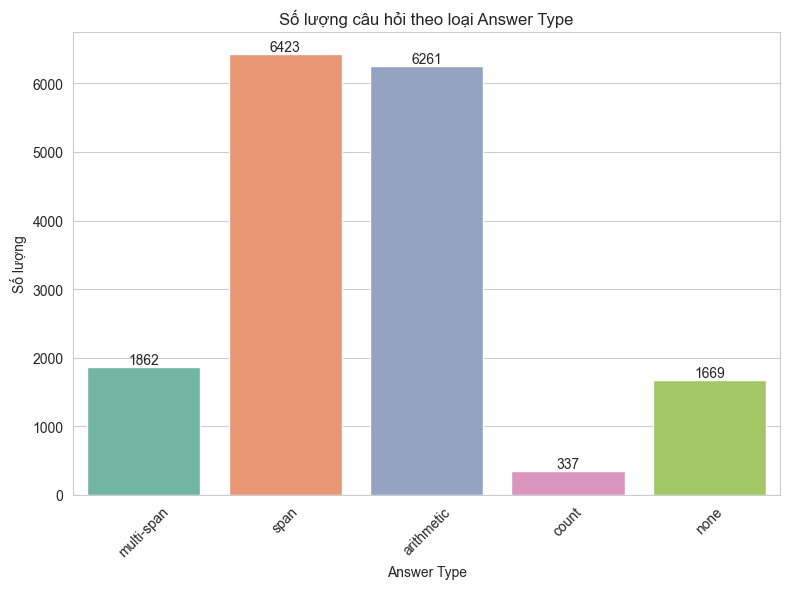

In [15]:
sns.set_style("whitegrid")

# Vẽ biểu đồ cột với Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_questions, x='answer_type', palette='Set2')

# Tiêu đề và nhãn
plt.title('Số lượng câu hỏi theo loại Answer Type')
plt.xlabel('Answer Type')
plt.ylabel('Số lượng')

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45)

# Thêm giá trị lên trên mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Điều chỉnh bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

/var/folders/zl/w0vj8dg91gg3w47_8p3fp2r00000gn/T/ipykernel_12371/1523035190.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_questions, x='answer_from', palette='Set2')


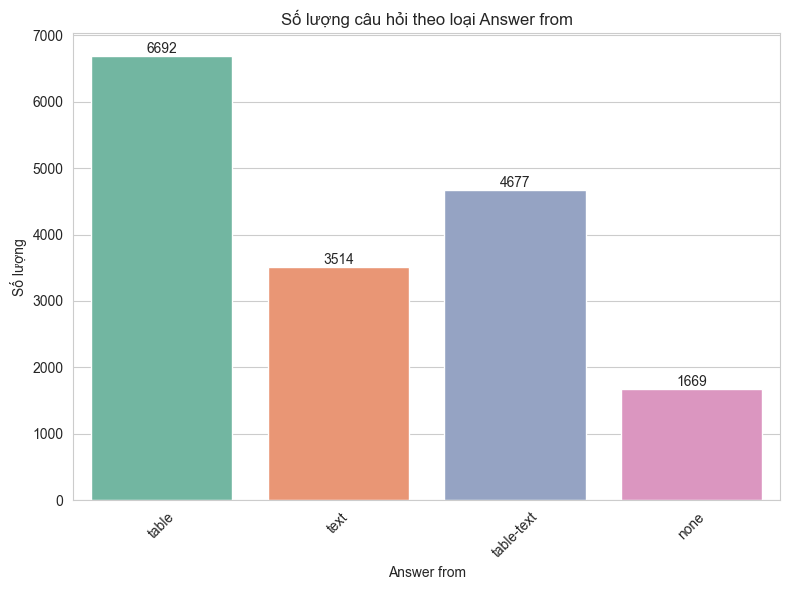

In [16]:
sns.set_style("whitegrid")

# Vẽ biểu đồ cột với Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_questions, x='answer_from', palette='Set2')

# Tiêu đề và nhãn
plt.title('Số lượng câu hỏi theo loại Answer from')
plt.xlabel('Answer from')
plt.ylabel('Số lượng')

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45)

# Thêm giá trị lên trên mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Điều chỉnh bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

/var/folders/zl/w0vj8dg91gg3w47_8p3fp2r00000gn/T/ipykernel_12371/1220793101.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_questions, x='req_comparison', palette='Set2')


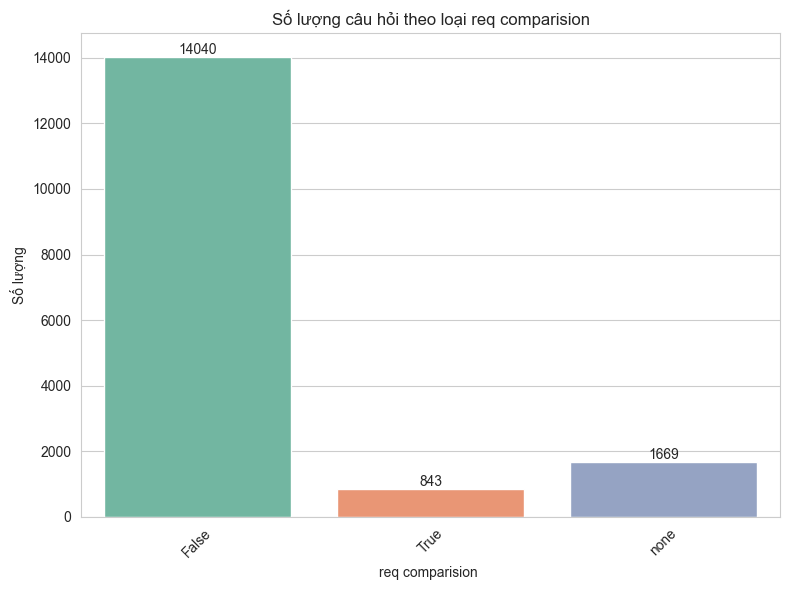

In [17]:
sns.set_style("whitegrid")

# Vẽ biểu đồ cột với Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_questions, x='req_comparison', palette='Set2')

# Tiêu đề và nhãn
plt.title('Số lượng câu hỏi theo loại req comparision')
plt.xlabel('req comparision ')
plt.ylabel('Số lượng')

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45)

# Thêm giá trị lên trên mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Điều chỉnh bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

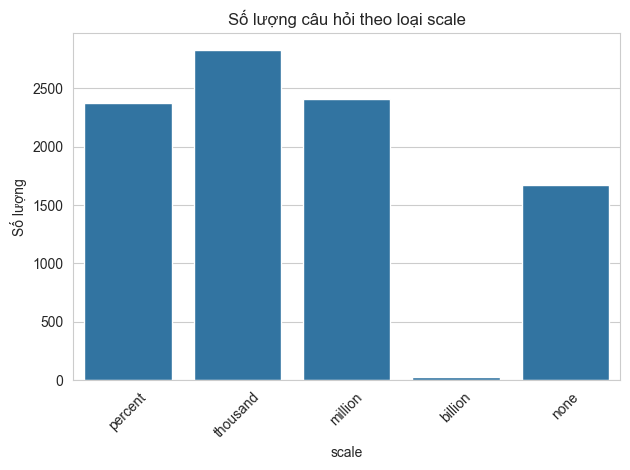

In [18]:
sns.countplot(data=df_questions[df_questions['scale'] != ''], x='scale')
plt.title("Số lượng câu hỏi theo loại scale")
plt.xlabel("scale")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


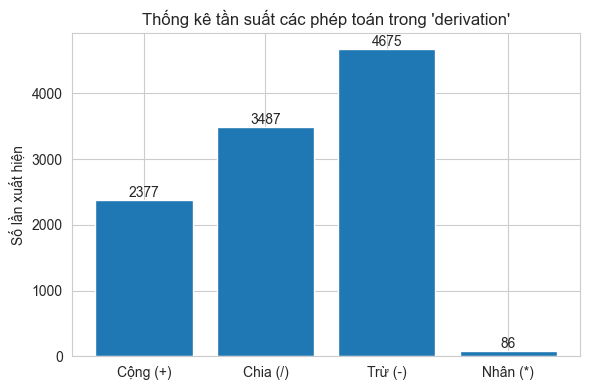

In [19]:
# 1. Lấy danh sách các derivation
derivations = [q.get("derivation", "") for item in data for q in item["questions"] if q.get("derivation")]

# 2. Tìm toán tử trong từng derivation
operators = []
for d in derivations:
    ops = re.findall(r"[\+\-\*/]", d.replace(" ", ""))
    operators.extend(ops)

# 3. Đếm tần suất từng toán tử
operator_counts = Counter(operators)

# 4. Đổi nhãn thành dạng dễ hiểu
labels_map = {
    "+": "Cộng (+)",
    "-": "Trừ (-)",
    "*": "Nhân (*)",
    "/": "Chia (/)"
}
labels = [labels_map[op] for op in operator_counts.keys()]
counts = list(operator_counts.values())

# 5. Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height}', ha='center', va='bottom', fontsize=10)

plt.title("Thống kê tần suất các phép toán trong 'derivation'")
plt.ylabel("Số lần xuất hiện")
plt.tight_layout()
plt.show()